<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Observations-:" data-toc-modified-id="Observations-:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Observations :</a></span><ul class="toc-item"><li><span><a href="#Clustering-avec-toutes-les-features" data-toc-modified-id="Clustering-avec-toutes-les-features-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Clustering avec toutes les features</a></span></li><li><span><a href="#Clustering-avec-seulement-RGB" data-toc-modified-id="Clustering-avec-seulement-RGB-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Clustering avec seulement RGB</a></span></li><li><span><a href="#Observation-:" data-toc-modified-id="Observation-:-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Observation :</a></span></li></ul></li><li><span><a href="#Clustering-with-HSV" data-toc-modified-id="Clustering-with-HSV-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Clustering with HSV</a></span></li><li><span><a href="#Contour-with-scikit-image" data-toc-modified-id="Contour-with-scikit-image-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Contour with scikit image</a></span></li></ul></div>

In [3]:
# fichier/tableaux
import pandas as pd

# calcul matriciel
import numpy as np
#statistics
import scipy
from scipy import stats
#plot graphique
import matplotlib.pyplot as plt
import seaborn as sns
#Algorithm clustering
from sklearn.cluster import KMeans
from sklearn import decomposition
#Image processing, computer vision
import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color
import utm
import geopandas as gpd

In [4]:
colnames = ['X','Y','Z','R','G','B']

In [5]:
t2 = pd.read_csv('test.txt',sep=' ',names=colnames,header=None)

In [6]:
t2 =t2.head(100000)

In [ ]:
a = t2.apply(lambda row: utm.to_latlon(t2.X, t2.Y, 32,'T'),axis=1)

In [ ]:
t2['latitude'] = a[0][0]

t2['longitude'] = a[0][1]
t2.head()

In [20]:
gdf = gpd.GeoDataFrame(t2, geometry=gpd.points_from_xy(t2.lon, t2.lat))
gdf.head()

,X,Y,Z,R,G,B,lon,lat,geometry
0,492208.220001,4.651216e+06,224.860001,56,62,21,42.012930,8.905897,POINT (42.01293007041956 8.905897351068731)
1,492208.230003,4.651216e+06,224.860001,42,48,18,42.012926,8.905897,POINT (42.01292646791945 8.905897477176387)
2,492208.300003,4.651215e+06,224.770004,43,47,22,42.012924,8.905898,POINT (42.01292358642328 8.90589832682171)
3,492208.190002,4.651209e+06,225.240005,64,71,20,42.012870,8.905897,POINT (42.01286972569382 8.905897077717535)
4,492208.180000,4.651209e+06,225.289993,64,71,22,42.012866,8.905897,POINT (42.01286576265329 8.905896962761824)


In [15]:
gdf.crs = {'init': 'epsg:4326', 'no_defs': True}

https://stackoverflow.com/questions/38961816/geopandas-set-crs-on-points

In [16]:
gdf.to_crs({'init': 'epsg:4326'}, inplace=True)

In [17]:
gdf.head()

,X,Y,Z,R,G,B,lon,lat,geometry
0,492208.220001,4.651216e+06,224.860001,56,62,21,42.012930,8.905897,POINT (492208.22000122 4651216.11999512)
1,492208.230003,4.651216e+06,224.860001,42,48,18,42.012926,8.905897,POINT (492208.2300033601 4651215.72000122)
2,492208.300003,4.651215e+06,224.770004,43,47,22,42.012924,8.905898,POINT (492208.3000030501 4651215.399993901)
3,492208.190002,4.651209e+06,225.240005,64,71,20,42.012870,8.905897,POINT (492208.1900024401 4651209.41999817)
4,492208.180000,4.651209e+06,225.289993,64,71,22,42.012866,8.905897,POINT (492208.18000031 4651208.97999573)


In [22]:
outfile = "droneGeoJson.json"
gdf.to_file(outfile, driver='GeoJSON')

In [9]:
t2 = t2.head(10)
a = t2.apply(lambda row: utm.to_latlon(t2.X, t2.Y, 32,'T'),axis=1)


In [ ]:
t2.to_csv("/Users/karinepetrus/Desktop/these_pro/Meteo_visualisation/geo_corse_test_2.csv")

# Exploring the data 

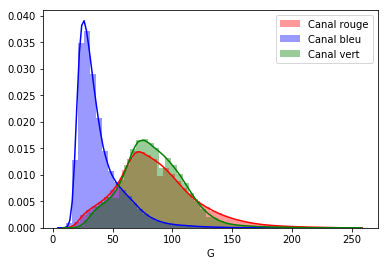

In [19]:
sns.distplot(t2['R'],color='r',label = 'Canal rouge')
sns.distplot(t2['B'],color='b', label = 'Canal bleu')
sns.distplot(t2['G'],color='g',label = 'Canal vert')
plt.xlabel('R')
plt.legend();

In [22]:
t2[['R','G','B']].describe()

,R,G,B
count,1.379716e+07,1.379716e+07,1.379716e+07
mean,8.533061e+01,8.370571e+01,3.856227e+01
std,3.292993e+01,2.604792e+01,1.868470e+01
min,8.000000e+00,1.100000e+01,6.000000e+00
25%,6.300000e+01,6.600000e+01,2.600000e+01
50%,8.100000e+01,8.200000e+01,3.300000e+01
75%,1.040000e+02,1.000000e+02,4.600000e+01
max,2.550000e+02,2.550000e+02,2.550000e+02


### Observations :

1. We can observe 2 distinct distributions (R/G and B)

# Clustering 

#### Clustering avec toutes les features

In [30]:
X = t2
kmeans = KMeans(n_clusters=2, random_state=0).fit(t2)#['R','G','B']

In [28]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [54]:
y_kmeans = kmeans.predict(t2)


array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [73]:
t2['label'] = y_kmeans
t2.head()
print(len(t2))

13797160


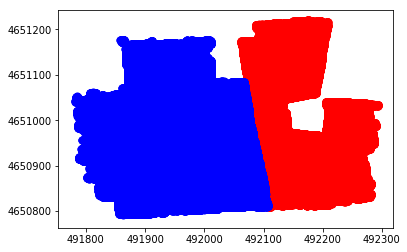

In [74]:
l = 1000000
t2_c1 = t2[t2.label==0]
t2_c2 = t2[t2.label==1]
plt.scatter(t2_c1['X'].values[0:l], t2_c1['Y'].values[0:l], c='r', s=50)
plt.scatter(t2_c2['X'].values[0:l], t2_c2['Y'].values[0:l], c='b', s=50)

In [ ]:
X = t2
kmeans = KMeans(n_clusters=4, random_state=0).fit(t2)#['R','G','B']

In [ ]:
l = 1000000
t2_c1 = t2[t2.label==0]
t2_c2 = t2[t2.label==1]
t2_c3 = t2[t2.label==2]
plt.scatter(t2_c1['X'].values[0:l], t2_c1['Y'].values[0:l], c='r', s=50)
plt.scatter(t2_c2['X'].values[0:l], t2_c2['Y'].values[0:l], c='b', s=50)
plt.scatter(t2_c3['X'].values[0:l], t2_c3['Y'].values[0:l], c='g', s=50)

#### Clustering avec seulement RGB

In [7]:
t2 = pd.read_csv('test.txt',sep=' ',names=colnames,header=None)
kmeans = KMeans(n_clusters=2, random_state=0).fit(t2[['R','G','B']])#['R','G','B']


In [109]:
y_kmeans = kmeans.predict(t2[['R','G','B']])
l = len(t2)
l = 100000
t2['label'] = y_kmeans
t2_c1 = t2[t2.label==0]
t2_c2 = t2[t2.label==1]
t2_c3 = t2[t2.label==2]
t2_c4 = t2[t2.label==3]
#plt.scatter(t2_c4['X'].values[0:l], t2_c4['Y'].values[0:l], c='m', s=50)
t2_c1.to_csv("t2_c1.csv")
t2_c2.to_csv("t2_c2.csv")

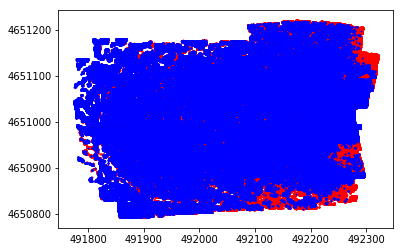

In [110]:
plt.scatter(t2_c1['X'].values, t2_c1['Y'].values, c='r', s=1)
plt.scatter(t2_c2['X'].values, t2_c2['Y'].values, c='b', s=1)
plt.scatter(t2_c3['X'].values, t2_c3['Y'].values, c='g', s=1)
plt.scatter(t2_c4['X'].values, t2_c4['Y'].values, c='m', s=1)

In [111]:
t2_c1.to_csv("t2_c0.csv")
t2_c2.to_csv("t2_c01.csv")

In [91]:
count_label=t2['label'].value_counts(dropna=False)

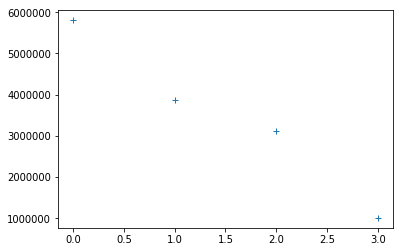

In [97]:
plt.plot(count_label,'+')

In [100]:
sum(count_label.values) 

13797160

In [101]:
len(t2)

13797160

In [104]:
t2_c1.to_csv("t2_c1.csv")
t2_c2.to_csv("t2_c2.csv")

In [106]:
t2_c2.to_csv("t2_c2.csv")

# RGB to HSV

In [8]:
t2.head()

,X,Y,Z,R,G,B
0,492208.220001,4.651216e+06,224.860001,56,62,21
1,492208.230003,4.651216e+06,224.860001,42,48,18
2,492208.300003,4.651215e+06,224.770004,43,47,22
3,492208.190002,4.651209e+06,225.240005,64,71,20
4,492208.180000,4.651209e+06,225.289993,64,71,22


In [137]:
t2 = t2.head(1000)
t2['delta'] = t2.apply(lambda row: np.float(max(row.R/255.,row.G/255.,row.B/255.)-min(row.R/255.,row.G/255.,row.B/255.)),axis=1)
t2['Cmax'] = t2.apply(lambda row: np.float(max(row.R/255,row.G/255,row.B/255)),axis=1)


In [138]:
t2.head()

,X,Y,Z,R,G,B,label,delta,Cmax
0,492208.220001,4.651216e+06,224.860001,56,62,21,0,0.160784,0.243137
1,492208.230003,4.651216e+06,224.860001,42,48,18,0,0.117647,0.188235
2,492208.300003,4.651215e+06,224.770004,43,47,22,0,0.098039,0.184314
3,492208.190002,4.651209e+06,225.240005,64,71,20,0,0.200000,0.278431
4,492208.180000,4.651209e+06,225.289993,64,71,22,0,0.192157,0.278431


In [164]:
condlist = [ t2['Cmax']== t2['R']/255., t2['Cmax']== t2['G']/255., t2['Cmax']== t2['B']/255.]
choicelist = [ 60 * (((t2['G']/255. - t2['B']/255.)/t2['delta']) % 6),  60 * (((t2['B']/255. - t2['R']/255.)/t2['delta']) + 2), 60 * (((t2['R']/255.-t2['G']/255.)/t2['delta']) + 4)]
t2['Hh'] =(np.select(condlist, choicelist))


In [165]:
condlist = [t2['Cmax'] == 0, t2['Cmax'] !=0 ]
choicelist = [0,t2['delta']/t2['Cmax']]
t2['S'] = np.select(condlist, choicelist)
t2['V'] = t2['Cmax'] 
t2.head()

,X,Y,Z,R,G,B,label,delta,Cmax,H,S,V,Hh
0,492208.220001,4.651216e+06,224.860001,56,62,21,0,0.160784,0.243137,0.0,0.661290,0.243137,68.780488
1,492208.230003,4.651216e+06,224.860001,42,48,18,0,0.117647,0.188235,0.0,0.625000,0.188235,72.000000
2,492208.300003,4.651215e+06,224.770004,43,47,22,0,0.098039,0.184314,0.0,0.531915,0.184314,69.600000
3,492208.190002,4.651209e+06,225.240005,64,71,20,0,0.200000,0.278431,0.0,0.718310,0.278431,68.235294
4,492208.180000,4.651209e+06,225.289993,64,71,22,0,0.192157,0.278431,0.0,0.690141,0.278431,68.571429


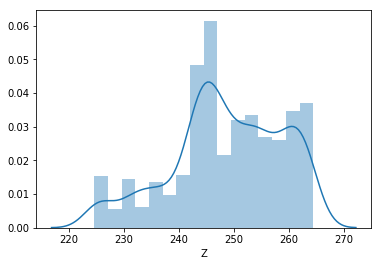

In [176]:
sns.distplot(t2['Z'])

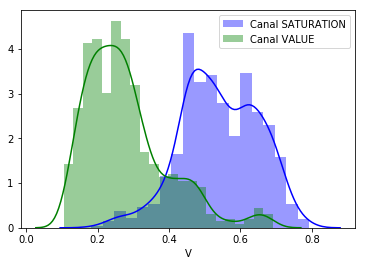

In [174]:
#sns.distplot(t2['H'],color='r',label = 'Canal HUE')
sns.distplot(t2['S'],color='b', label = 'Canal SATURATION')
sns.distplot(t2['V'],color='g',label = 'Canal VALUE')

plt.legend();

In [170]:
t2[['H','S','V']].describe()

,H,S,V
count,1000.0,1000.000000,1000.000000
mean,0.0,0.541194,0.279733
std,0.0,0.108747,0.115998
min,0.0,0.181818,0.105882
25%,0.0,0.465065,0.196078
50%,0.0,0.534884,0.254902
75%,0.0,0.626866,0.329412
max,0.0,0.792208,0.690196


#### Observation : 
1.

2.


### Clustering with HSV 

### Contour with scikit image

In [175]:
 from skimage.morphology import watershed

# Contour with erosion, dilation filtering

In [10]:
import cv2


In [11]:
img = cv2.imread('raster.tif',0)

In [14]:
kernel = np.ones((1,1),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)

TypeError: Image data cannot be converted to float

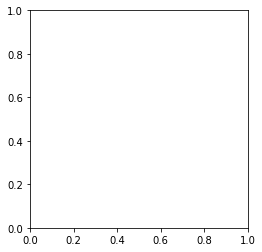

In [17]:
plt.imshow(erosion)